In [4]:
import pandas as pd
import matplotlib.pyplot as plt
file = 'mushrooms.csv'
df = pd.read_csv(file)
df

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),date
0,1057,Ajmer,Ajmer(F&V),Guava,Other,Small,800,1400,1200,02-Jan-14
1,1037,Ajmer,Ajmer(F&V),Guava,Other,Small,700,1400,950,03-Jan-14
2,1049,Ajmer,Ajmer(F&V),Guava,Other,Small,800,1300,1000,06-Jan-14
3,1042,Ajmer,Ajmer(F&V),Guava,Other,Small,800,1200,900,07-Jan-14
4,1043,Ajmer,Ajmer(F&V),Guava,Other,Small,800,1200,950,08-Jan-14
...,...,...,...,...,...,...,...,...,...,...
1179,967,Ajmer,Ajmer(F&V),Guava,Other,Large,2000,3000,2500,28-Apr-24
1180,1004,Ajmer,Ajmer(F&V),Guava,Other,Large,2500,3000,2800,14-May-24
1181,968,Ajmer,Ajmer(F&V),Guava,Other,Large,2000,3000,2500,28-Jun-24
1182,1012,Ajmer,Ajmer(F&V),Guava,Other,Large,2500,3500,3000,04-Jul-24


In [6]:
columns_to_drop = ['Sl no.', 'District Name', 'Market Name', 'Commodity', 'Variety', 'Grade']
df = df.drop(columns=columns_to_drop)

In [7]:
df

,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),date
0,800,1400,1200,02-Jan-14
1,700,1400,950,03-Jan-14
2,800,1300,1000,06-Jan-14
3,800,1200,900,07-Jan-14
4,800,1200,950,08-Jan-14
...,...,...,...,...
1179,2000,3000,2500,28-Apr-24
1180,2500,3000,2800,14-May-24
1181,2000,3000,2500,28-Jun-24
1182,2500,3500,3000,04-Jul-24


In [8]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date'].fillna(pd.Timestamp('1900-01-01'), inplace=True)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df


C:\Users\harsh\AppData\Local\Temp\ipykernel_9536\3110719229.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')
C:\Users\harsh\AppData\Local\Temp\ipykernel_9536\3110719229.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['date'].fillna(pd.Timestamp('1900-01-01'), inplace=True)


,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),date,year,month,day
0,800,1400,1200,2014-01-02,2014,1,2
1,700,1400,950,2014-01-03,2014,1,3
2,800,1300,1000,2014-01-06,2014,1,6
3,800,1200,900,2014-01-07,2014,1,7
4,800,1200,950,2014-01-08,2014,1,8
...,...,...,...,...,...,...,...
1179,2000,3000,2500,2024-04-28,2024,4,28
1180,2500,3000,2800,2024-05-14,2024,5,14
1181,2000,3000,2500,2024-06-28,2024,6,28
1182,2500,3500,3000,2024-07-04,2024,7,4


In [9]:
# Convert price columns to numeric, handling any non-numeric entries
df['Min Price (Rs./Quintal)'] = pd.to_numeric(df['Min Price (Rs./Quintal)'], errors='coerce')
df['Max Price (Rs./Quintal)'] = pd.to_numeric(df['Max Price (Rs./Quintal)'], errors='coerce')
df['Modal Price (Rs./Quintal)'] = pd.to_numeric(df['Modal Price (Rs./Quintal)'], errors='coerce')

# Handle any missing values that may have resulted from non-numeric entries
df['Min Price (Rs./Quintal)'].fillna(0, inplace=True)
df['Max Price (Rs./Quintal)'].fillna(0, inplace=True)
df['Modal Price (Rs./Quintal)'].fillna(0, inplace=True)


C:\Users\harsh\AppData\Local\Temp\ipykernel_9536\2550992506.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Min Price (Rs./Quintal)'].fillna(0, inplace=True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_9536\2550992506.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [10]:
df.set_index('date', inplace=True)

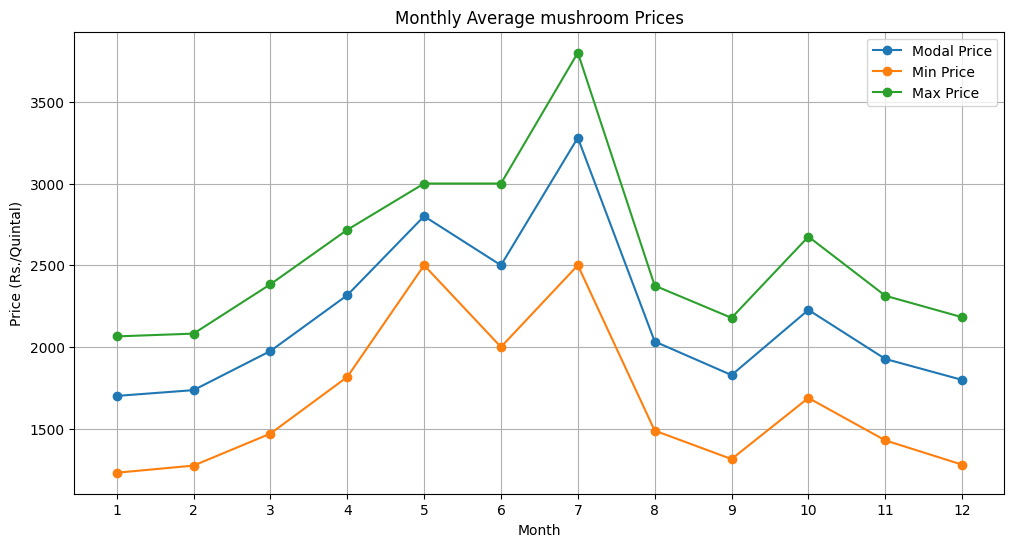

In [12]:
import matplotlib.pyplot as plt
monthly_avg_prices = df.groupby('month')[['Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)', 'Modal Price (Rs./Quintal)']].mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_prices.index, monthly_avg_prices['Modal Price (Rs./Quintal)'], marker='o', linestyle='-', label='Modal Price')
plt.plot(monthly_avg_prices.index, monthly_avg_prices['Min Price (Rs./Quintal)'], marker='o', linestyle='-', label='Min Price')
plt.plot(monthly_avg_prices.index, monthly_avg_prices['Max Price (Rs./Quintal)'], marker='o', linestyle='-', label='Max Price')
plt.title('Monthly Average mushroom Prices')
plt.xlabel('Month')
plt.ylabel('Price (Rs./Quintal)')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()
